# Explore Dataset

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
df_breast = pd.read_csv('data/breast-level_annotations.csv')
df_findings = pd.read_csv('data/finding_annotations.csv')

In [3]:
total_count = df_findings['image_id'].nunique()
print("Total count of unique image_ids: ", total_count)

Total count of unique image_ids:  20000


In [4]:
# resmin içindeki bbox'ların tekil+toplam olarak resme oranlarının min-max-avg istatistikleri
# filterelemelerin ardından, filtreli df'ler ile SHA256SUM dosyası birleştiriilerek, sadece seçilen image'ler için image adı, sha değeri vs gibi gerekli bilgileri
# içeren yeni bir csv hazırlanacak, wget sadece bu csv'deki dosyaları indirecek (uncompressed ~30GB). bu veriler proje altına değil, /data altına indirilecek
# tfrecord'a da burada dönüştürülecek. /data altındaki tfrecord'dan okunacak.

## Breast Level Annotations

### Data Balance

Split:
training    16000
test         4000
Name: split, dtype: int64

Laterality:
L    10000
R    10000
Name: laterality, dtype: int64

View Position:
CC     10001
MLO     9999
Name: view_position, dtype: int64

Shape:
2800x3518    15244
2012x2812     3796
2812x3580      365
2718x3580       50
2702x3580       48
2606x3580       41
2750x3580       41
2670x3580       40
2654x3580       33
2686x3580       30
2766x3580       27
2734x3580       27
2622x3580       21
2638x3580       20
2706x3580       12
2798x3580       11
2782x3580       10
2736x3580       10
2681x3580       10
2712x3580        9
2700x3580        9
2742x3580        9
2772x3580        9
2754x3580        8
2675x3580        8
2694x3580        8
2724x3580        7
2730x3580        7
2657x3580        6
2615x3580        5
2687x3580        5
2663x3580        5
2621x3580        5
2597x3580        5
2639x3580        5
2633x3580        4
2669x3580        4
2778x3580        4
2585x3580        3
2760x3580        3
2802x3580        3
28

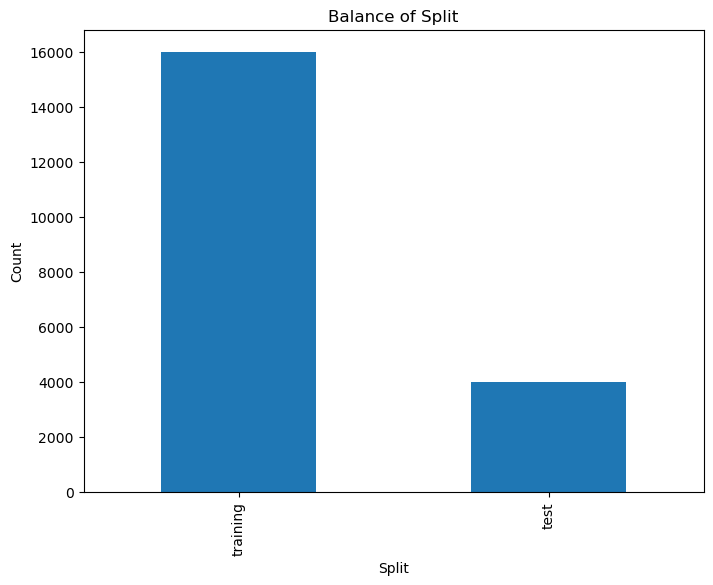

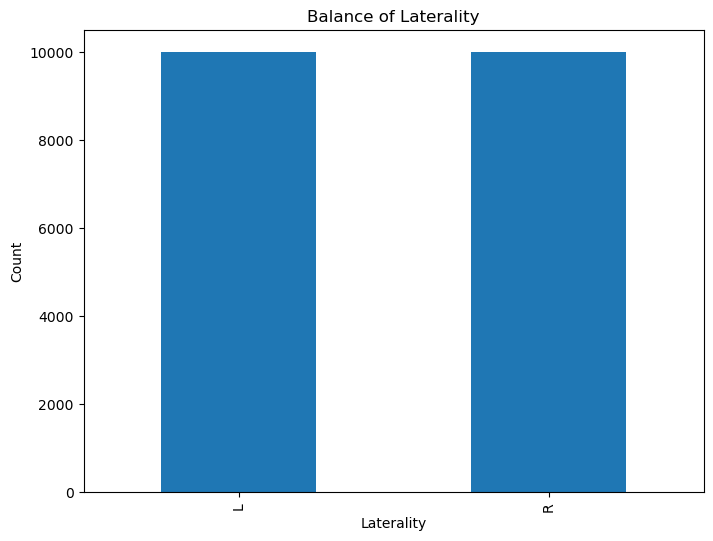

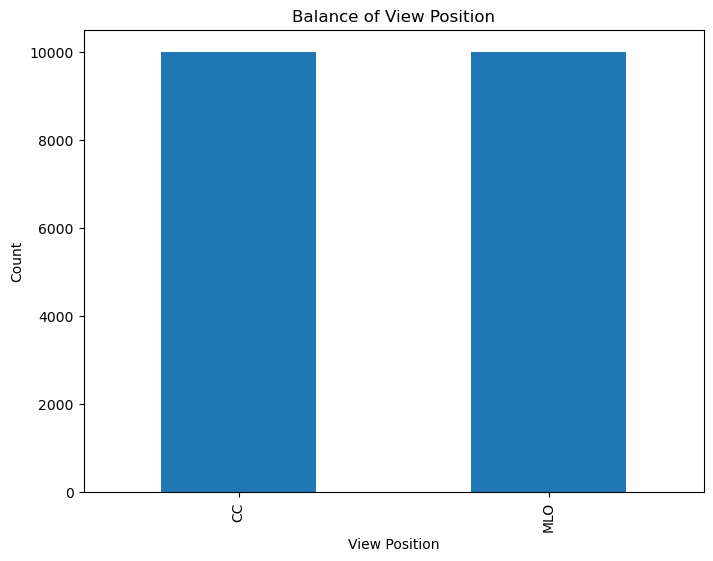

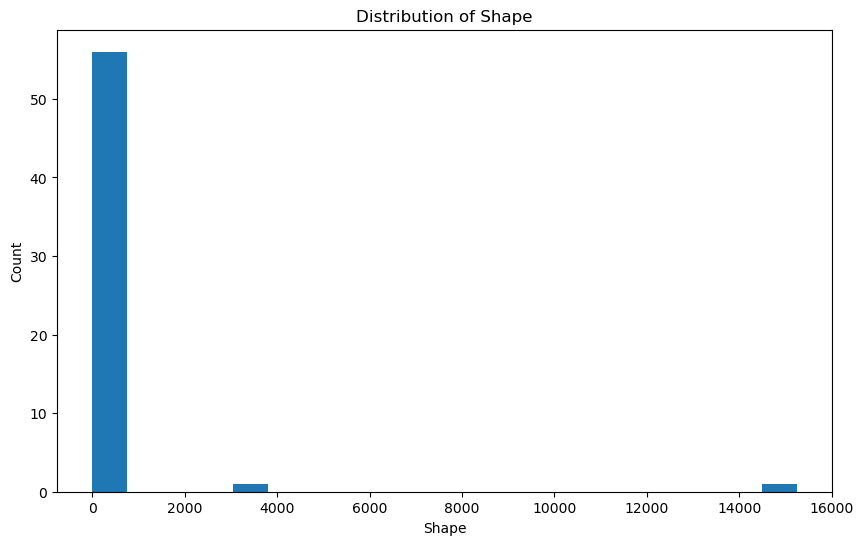

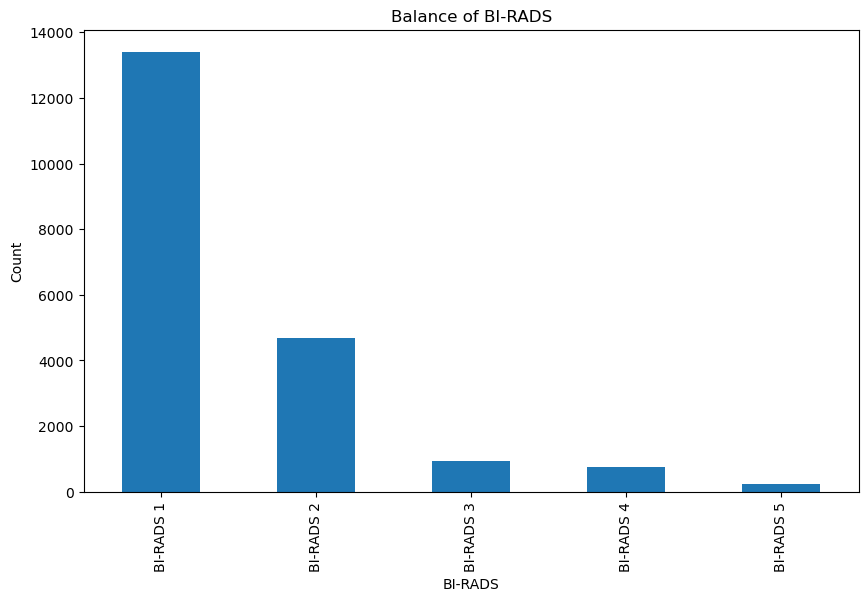

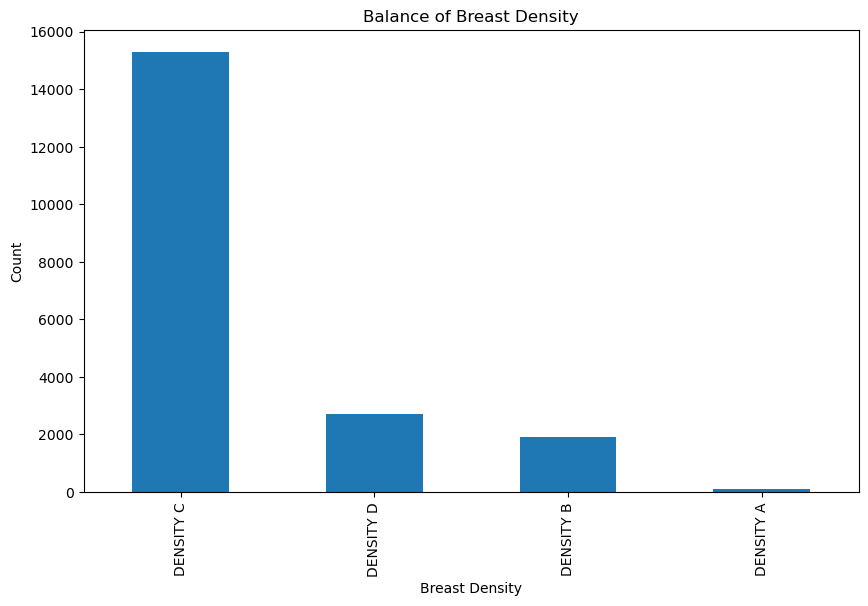

In [6]:
df_breast_copy = df_breast.copy()
df_breast_copy.loc[:, 'image_shape'] = df_breast_copy['width'].astype(str) + 'x' + df_breast_copy['height'].astype(str)
df_breast = df_breast_copy.copy()

balance_split = df_breast['split'].value_counts()
balance_laterality = df_breast['laterality'].value_counts()
balance_view_position = df_breast['view_position'].value_counts()
balance_birads = df_breast['breast_birads'].value_counts()
balance_density = df_breast['breast_density'].value_counts()
balance_shape = df_breast['image_shape'].value_counts()


print("Split:")
print(balance_split)
print()

print("Laterality:")
print(balance_laterality)
print()

print("View Position:")
print(balance_view_position)
print()

print("Shape:")
print(balance_shape)
print()

print("BI-RADS:")
print(balance_birads)
print()

print("Density:")
print(balance_density)


# Plotting split
plt.figure(figsize=(8, 6))
balance_split.plot(kind='bar')
plt.title('Balance of Split')
plt.xlabel('Split')
plt.ylabel('Count')
plt.show()

# Plotting laterality
plt.figure(figsize=(8, 6))
balance_laterality.plot(kind='bar')
plt.title('Balance of Laterality')
plt.xlabel('Laterality')
plt.ylabel('Count')
plt.show()

# Plotting view_position
plt.figure(figsize=(8, 6))
balance_view_position.plot(kind='bar')
plt.title('Balance of View Position')
plt.xlabel('View Position')
plt.ylabel('Count')
plt.show()

# Plotting shape
plt.figure(figsize=(10, 6))
balance_shape.plot(kind='hist', bins=20)
plt.title('Distribution of Shape')
plt.xlabel('Shape')
plt.ylabel('Count')
plt.show()

# Plotting breast_birads
plt.figure(figsize=(10, 6))
balance_birads.plot(kind='bar')
plt.title('Balance of BI-RADS')
plt.xlabel('BI-RADS')
plt.ylabel('Count')
plt.show()

# Plotting breast_density
plt.figure(figsize=(10, 6))
balance_density.plot(kind='bar')
plt.title('Balance of Breast Density')
plt.xlabel('Breast Density')
plt.ylabel('Count')
plt.show()

## Finding Annotations

### Annotation per image statistics

In [7]:
min_rows_by_image = df_findings['image_id'].value_counts().min()
max_rows_by_image = df_findings['image_id'].value_counts().max()
avg_rows_by_image = df_findings['image_id'].value_counts().mean()

print("Minimum Number of Data Rows by image_id:", min_rows_by_image)
print("Maximum Number of Data Rows by image_id:", max_rows_by_image)
print("Average Number of Data Rows by image_id:", avg_rows_by_image)

Minimum Number of Data Rows by image_id: 1
Maximum Number of Data Rows by image_id: 7
Average Number of Data Rows by image_id: 1.0243


finding_categories:
['No Finding']                                                                                      18232
['Mass']                                                                                             1123
['Suspicious Calcification']                                                                          402
['Focal Asymmetry']                                                                                   232
['Architectural Distortion']                                                                           95
['Asymmetry']                                                                                          90
['Suspicious Calcification', 'Mass']                                                                   82
['Suspicious Lymph Node']                                                                              57
['Skin Thickening']                                                                                    38
['Suspicious Calcification

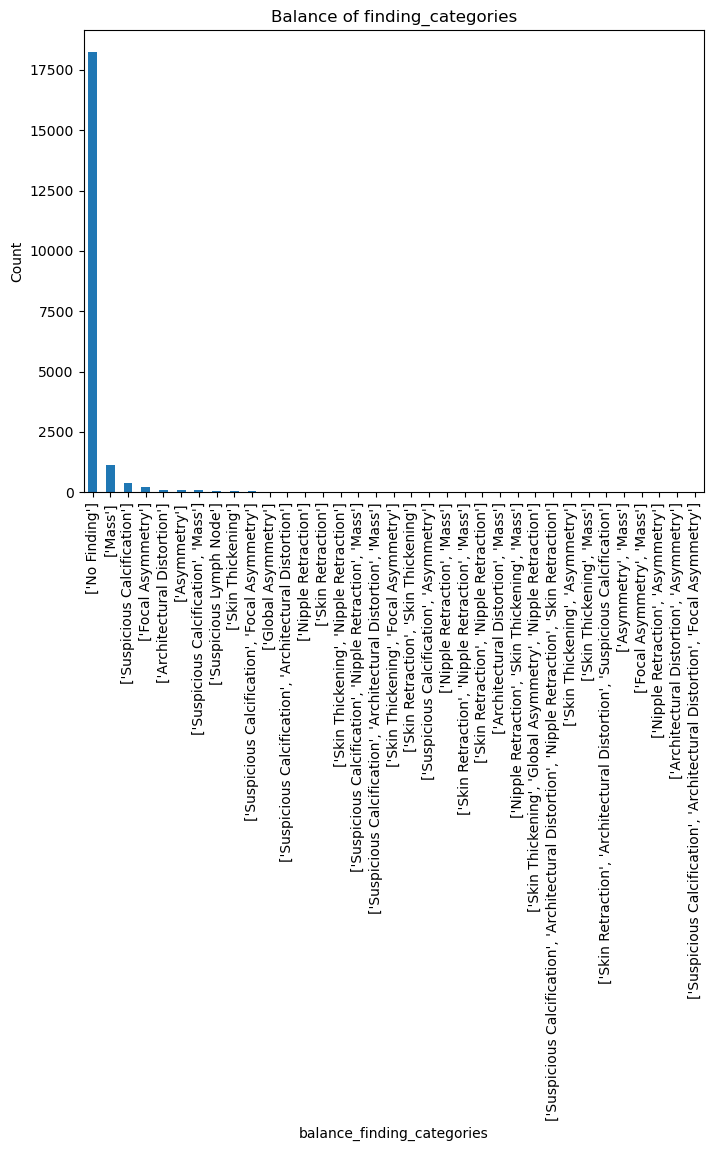

In [8]:
balance_finding_categories = df_findings['finding_categories'].value_counts()

print("finding_categories:")
print(balance_finding_categories)
print()

# Plotting laterality
plt.figure(figsize=(8, 6))
balance_finding_categories.plot(kind='bar')
plt.title('Balance of finding_categories')
plt.xlabel('balance_finding_categories')
plt.ylabel('Count')
plt.show()

### valid/invalid annotations

In [9]:
valid_rows = (
    (df_findings['xmin'] >= 0) &
    (df_findings['xmax'] > df_findings['xmin']) &
    (df_findings['xmax'] <= df_findings['width']) &
    (df_findings['ymin'] >= 0) &
    (df_findings['ymax'] > df_findings['ymin']) &
    (df_findings['ymax'] <= df_findings['height'])
)
invalid_rows = ~valid_rows

num_valid_rows = valid_rows.sum()
num_invalid_rows = invalid_rows.sum()

# Print some examples of valid rows
print("Examples of Valid Rows:")
print(df_findings.loc[valid_rows, ['image_id', 'xmin', 'ymin', 'xmax', 'ymax', 'width', 'height']].sample(5))

print()

# Print some examples of invalid rows
print("Examples of Invalid Rows:")
print(df_findings.loc[invalid_rows, ['image_id', 'xmin', 'ymin', 'xmax', 'ymax', 'width', 'height']].sample(5))

print("Number of Valid Data Rows:", num_valid_rows)
print("Number of Invalid Data Rows:", num_invalid_rows)

Examples of Valid Rows:
                              image_id         xmin         ymin         xmax  \
558   031592807c30b54e2fb4bd2400e634e8   362.895996  1278.180054   762.830017   
443   f0e839f095171073b5348bb756afb32f  1460.439941  2438.830078  1568.400024   
84    99f5d42f781a68bf912189a86e6503d9  2147.899902  1301.599976  2608.389893   
1320  0cf9cd3d36a7bfb95e66c0ba482eb8c0  2027.060059  1280.849976  2414.179932   
1829  51e2448b06afa7492addc6e8a5fb3633  1503.760010  1543.550049  1886.119995   

             ymax  width  height  
558   1750.560059   2800    3518  
443   2579.239990   2800    3518  
84    1854.810059   2800    3518  
1320  1437.079956   2800    3518  
1829  1931.819946   2012    2812  

Examples of Invalid Rows:
                               image_id  xmin  ymin  xmax  ymax  width  height
6490   5e237c5ad772e1bbd8ca67cfae25f6df   NaN   NaN   NaN   NaN   2800    3518
17411  cd3cc5b6814968ba054aab11f163695e   NaN   NaN   NaN   NaN   2012    2812
10973  38a81b16

In [10]:
# Calculate the bbox area
df_findings['bbox_area'] = (df_findings['xmax'] - df_findings['xmin']) * (df_findings['ymax'] - df_findings['ymin'])

# Calculate the image area
df_findings['image_area'] = df_findings['width'] * df_findings['height']

# Calculate the bbox area to image area percentage
df_findings['bbox_area_percentage_individual'] = (df_findings['bbox_area'] / df_findings['image_area']) * 100

# Calculate the statistics
bbox_area_percentage_stats = df_findings['bbox_area_percentage_individual'].describe()

# Print the statistics
print("Bbox Area to Image Area Percentage Statistics:")
print(bbox_area_percentage_stats[['min', 'max', 'mean']])


Bbox Area to Image Area Percentage Statistics:
min      0.005343
max     27.635832
mean     1.256729
Name: bbox_area_percentage_individual, dtype: float64


In [11]:
# Group by image_id and calculate the total bbox area and total image area for each image
image_areas = df_findings.groupby('image_id')[['bbox_area', 'image_area']].sum()

# Calculate the bbox area to image area percentage
image_areas['bbox_area_percentage_total'] = (image_areas['bbox_area'] / image_areas['image_area']) * 100

# Calculate the statistics
bbox_area_percentage_stats = image_areas['bbox_area_percentage_total'].describe()

# Print the statistics
print("Bbox Area to Image Area Percentage Statistics:")
print(bbox_area_percentage_stats[['min', 'max', 'mean']])


Bbox Area to Image Area Percentage Statistics:
min      0.000000
max     27.635832
mean     0.109762
Name: bbox_area_percentage_total, dtype: float64


# Data Preprocessing

As you can see above, the data has issues listed below:
1. **Images without annotation**
1. **BI-RADS2 images with annotations**
1. **invalid annotations**
1. **Not all images have the same shape**
1. **Unbalance in the following columns: breat_birads, breast_density, finding_categories**

The errors in the first three items will be solved by manipulations on the metadata given in csv format in the steps you will see shortly. Later, these edited data will be used to prepare the dataset to be created for the Deep Learning model. for example: filtered-deleted records here will not be included in the next steps and training of the Deep Learning network.

The las two items will be solved by manipulation on images and some computer vision techniques (eg data augmentation).

## 1. Filtering İmages Without Objects
Considering our Object Recognition task, we may want to filter out some data to create a more suitable dataset.
In Image Recognition using Deep Learning, we don't need to pass images without objects through our network. Therefore, we will filter out these object-free images. These data have been marked by the creators of the dataset by setting the "finding_categories" column to ["No Finding"].

We can also store those removed records to use as negative test images to challenge our Model's False-Positive performance

[Reference-1](https://arxiv.org/pdf/1708.02002.pdf)
[Reference-2](https://ai.stackexchange.com/a/28376)

In [12]:
# Remove records from df_findings with finding_categories = ["No Finding"]
df_findings_filtered = df_findings[~df_findings['finding_categories'].apply(lambda x: x == "['No Finding']")]

# Get the image_ids of the removed records from df_findings
removed_image_ids = set(df_findings['image_id']) - set(df_findings_filtered['image_id'])

# Remove the corresponding records from df_breass and store them in a separate dataset
df_breast_filtered = df_breast[~df_breast['image_id'].isin(removed_image_ids)]
removed_records_breast = df_breast[df_breast['image_id'].isin(removed_image_ids)]

# Store the removed records from df_findings and df_breas in separate datasets
removed_records_findings = df_findings[df_findings['image_id'].isin(removed_image_ids)]

# Save the removed records to separate CSV files
removed_records_findings.to_csv('data/removed_records_findings.csv', index=False)
removed_records_breast.to_csv('data/removed_records_breast.csv', index=False)

## 2. Filtering BI-RADS2 images with annotations
Although the creators of the dataset say "The findings of BI-RADS 2, i.e., benign, were not marked. Only findings of either BI-RADS 3, 4, or 5, which require follow-up examination, were annotated by bounding boxes."(1) I found some records in the data that contradicted this statement, I assumed there might have been an error here and deleted them from the dataset.

[1](https://physionet.org/content/vindr-mammo/1.0.0/)

In [13]:
# Find the improper image_ids
improper_ids = df_breast_filtered[df_breast_filtered['breast_birads'] == 'BI-RADS 2']['image_id'].tolist()

# Print the records in df_findings_filtered with the improper image_ids
print("Records in df_findings_filtered with improper image_ids:")
print(df_findings_filtered[df_findings_filtered['image_id'].isin(improper_ids)])

# Remove the improper image_ids from both dataframes
df_findings_filtered = df_findings_filtered[~df_findings_filtered['image_id'].isin(improper_ids)]
df_breast_filtered = df_breast_filtered[~df_breast_filtered['image_id'].isin(improper_ids)]

Records in df_findings_filtered with improper image_ids:
                              study_id                         series_id  \
1688  957131e9de2efc7a74813d9ff5e43bc5  636854f88aeb8d745595e4dc2ad94a31   
1727  eb06908791374f31906e18b6049af92b  c1f6f5deb3c6303932acd99349433bd9   
1728  eb06908791374f31906e18b6049af92b  c1f6f5deb3c6303932acd99349433bd9   
1748  06582906eb5ea3a4e7aa5d1fd7feb1c1  f611ab760eb7ceb2fc58859837039df0   
1757  d415d39327b7fe16b7d63e0f2840f547  172bb41ecad15694f5c0f43a14b7be9b   
1758  d415d39327b7fe16b7d63e0f2840f547  172bb41ecad15694f5c0f43a14b7be9b   
1860  cfce7e93022304b7099313720dcd3932  94f3f094a1d371a3ad6e2160be8ee53f   
1959  a9e64dc54160d9c4344607e0673a8d3e  eac507ac4a331622656d85d4340aaf37   
1960  a9e64dc54160d9c4344607e0673a8d3e  eac507ac4a331622656d85d4340aaf37   
1982  ecd281761b3bcd696cb6ef2684162d1a  8f91f5ea7782b0e4ab38d84c58c1c319   
2229  790b5711d9976904cd6770d69a25c237  3eb5427bf0fd3531bd5ac6e9fb0be7b8   
2230  790b5711d9976904cd6770d69

## 3. Clipping bounding box coordinates
As you can see, the all of invalid bbox coordinates are caused by these coordinates not suits within the range of image dimensions with slight deviations. Here, we assume these errors as small errors that could have occurred during dataset creation. We have decided to tolerate these small errors by clipping the bbox coordinates within the shape range of the image.

In [14]:
valid_rows = (
    (df_findings_filtered['xmin'] >= 0) &
    (df_findings_filtered['xmax'] > df_findings_filtered['xmin']) &
    (df_findings_filtered['xmax'] <= df_findings_filtered['width']) &
    (df_findings_filtered['ymin'] >= 0) &
    (df_findings_filtered['ymax'] > df_findings_filtered['ymin']) &
    (df_findings_filtered['ymax'] <= df_findings_filtered['height'])
)
invalid_rows = ~valid_rows

num_valid_rows = valid_rows.sum()
num_invalid_rows = invalid_rows.sum()

# Print some examples of invalid rows
print("Examples of Invalid Rows:")
print(df_findings_filtered.loc[invalid_rows, ['xmin', 'ymin', 'xmax', 'ymax', 'width', 'height']])#.sample(5))

print("Number of Valid Data Rows:", num_valid_rows)
print("Number of Invalid Data Rows:", num_invalid_rows)

Examples of Invalid Rows:
             xmin         ymin         xmax         ymax  width  height
15      -6.252970  1805.459961   180.511002  1996.949951   2800    3518
100   2516.540039  1694.959961  2800.429932  2098.000000   2800    3518
419     -3.370920  1575.550049   237.561005  1841.989990   2800    3518
569    -16.115000   123.439003   134.753998   411.462006   2800    3518
627     -9.305930  1362.119995   386.425995  2308.120117   2800    3518
628     -3.412000  1571.739990   485.959991  2226.010010   2800    3518
652   2331.139893  1795.310059  2800.889893  2113.439941   2800    3518
727   2698.010010  1564.300049  2812.360107  1715.729980   2800    3518
816     -4.561840  1163.489990   228.869003  1394.270020   2800    3518
883   2497.669922  1734.849976  2800.939941  1952.229980   2800    3518
958     -2.305530   929.244019   751.697998  2250.510010   2800    3518
1052    -9.853530   910.143982   372.868011  1381.189941   2800    3518
1160  2320.419922   803.931030  2817.3

In [15]:
df_findings_filtered['xmin'] = df_findings_filtered['xmin'].clip(0, df_findings_filtered['width'])
df_findings_filtered['xmax'] = df_findings_filtered['xmax'].clip(0, df_findings_filtered['width'])
df_findings_filtered['ymin'] = df_findings_filtered['ymin'].clip(0, df_findings_filtered['height'])
df_findings_filtered['ymax'] = df_findings_filtered['ymax'].clip(0, df_findings_filtered['height'])

## Preparing new csv to download onyl necessary images

In [16]:
total_count = df_breast_filtered['image_id'].nunique()
print("Total count of unique image_ids: ", total_count)
# it means uncompressed data size should be decreased to approximately 30 GB from 338 GB

Total count of unique image_ids:  1756


In [17]:
import pandas as pd

# Read the text file
with open('data/SHA256SUMS.txt', 'r') as file:
    lines = file.readlines()

# Process each line and create a DataFrame
data = []
for line in lines[3:]:
    try:
        line = line.strip()
        sha256_hash, relative_path = line.split(" ")
        image_id = relative_path.split("images/")[1].split('/')[1].split(".dicom")[0]
        data.append([sha256_hash, relative_path, image_id])
    except Exception as e:
        print(line)
        print(e)

# Create the DataFrame
df_sha = pd.DataFrame(data, columns=['sha256_hash', 'relative_path', 'image_id'])

# Display the DataFrame
print(df_sha)

44ec668cb1a43b526a4c9ab341ae748edbd26b451d7ad72a139e070d13020206 metadata.csv
list index out of range
                                             sha256_hash  \
0      959003944b55dab72f6d77761c3361432cfaaf71369075...   
1      8a8eeae5dad3a1566375002968a4a7bb1dbf329e75053c...   
2      0c58f1082795fd6518ccd7e18c79fd09c6a93a05874fc0...   
3      aedd0c1d1e997d1ea796e435c00454bb869d0ac42dfcbd...   
4      9c368343493dd105e54f9e87be07dafa32510e2800c28a...   
...                                                  ...   
19995  ad8a2f51fa0f63f52f1d91fe350abe956dc3a50f25f2b6...   
19996  2f6c37847119e1f20a17d6287fdf5c5807efad29763cff...   
19997  88c05bf2c6a469eaffc31aaf9d31cbebc6ef8436b1d6f3...   
19998  37db1482ddc3aac6d6a72ebcb0c463db3bf619dbb263ad...   
19999  742e77ef7e8559a77477727e8dbc7e34eec4429f1fd820...   

                                           relative_path  \
0      images/0025a5dc99fd5c742026f0b2b030d3e9/2ddfad...   
1      images/0025a5dc99fd5c742026f0b2b030d3e9/451562... 

In [18]:
df_images_to_download = df_breast_filtered.copy().loc[:, ['study_id', 'image_id']]
df_images_to_download

,study_id,image_id
24,cca141f804a8ab8b584d63102bc7f3f7,aad38467d1f04cedf300c9c8305a3536
25,cca141f804a8ab8b584d63102bc7f3f7,2ccefd9e7701acf52c92275e844f7578
28,9ec3039bf215173edf48a8b4f23ad56a,2b46a6fc2c076cfc187b385f6a6f40e6
29,9ec3039bf215173edf48a8b4f23ad56a,8338207743a394ab8b56b5b920fc30b6
36,7ee98232df9bcefc6b54530b6a616690,39a9809abe1441f60f9fab50679c2a73
...,...,...
19895,7c98228fc11204260460934ba8c6e12b,9d88128064cdbc7d426f36da953cebbb
19898,b8acac150be7f949f78dc631a3851f8b,bdf1539e07e60cfcb5e7833f5b63fa86
19899,b8acac150be7f949f78dc631a3851f8b,dbe631b24f8759c7f7022513582c39ba
19900,0bfd4fcebaba4e9c4086edd05044a75f,997e15346547ff56b4209ac73e74556f


In [19]:
# Perform a left join on image_id
df_images_to_download_with_sha = df_images_to_download.merge(df_sha, on='image_id', how='left')
df_images_to_download_with_sha

,study_id,image_id,sha256_hash,relative_path
0,cca141f804a8ab8b584d63102bc7f3f7,aad38467d1f04cedf300c9c8305a3536,09187919cd189282570ae84a250530ad6c039ef660029a...,images/cca141f804a8ab8b584d63102bc7f3f7/aad384...
1,cca141f804a8ab8b584d63102bc7f3f7,2ccefd9e7701acf52c92275e844f7578,c2baa6bf19c4f6bfdad5d9fa3c8d3b4b5525ec365acd09...,images/cca141f804a8ab8b584d63102bc7f3f7/2ccefd...
2,9ec3039bf215173edf48a8b4f23ad56a,2b46a6fc2c076cfc187b385f6a6f40e6,7d7ca6189fc2a2f070642ea693abf8253b5a0cfd7a1513...,images/9ec3039bf215173edf48a8b4f23ad56a/2b46a6...
3,9ec3039bf215173edf48a8b4f23ad56a,8338207743a394ab8b56b5b920fc30b6,7af5cb25b46843d5ed481196cec5e0e1df5123f9da5cbb...,images/9ec3039bf215173edf48a8b4f23ad56a/833820...
4,7ee98232df9bcefc6b54530b6a616690,39a9809abe1441f60f9fab50679c2a73,60630f8cbee61821e44fb98c291fa8d4c24f32c643a9ae...,images/7ee98232df9bcefc6b54530b6a616690/39a980...
...,...,...,...,...
1751,7c98228fc11204260460934ba8c6e12b,9d88128064cdbc7d426f36da953cebbb,d9715618354adc10d9d545a1c0820001f03ff2f5e43980...,images/7c98228fc11204260460934ba8c6e12b/9d8812...
1752,b8acac150be7f949f78dc631a3851f8b,bdf1539e07e60cfcb5e7833f5b63fa86,d146c74e71b6ed4b25ac7233b636b74f76954c09b7cae8...,images/b8acac150be7f949f78dc631a3851f8b/bdf153...
1753,b8acac150be7f949f78dc631a3851f8b,dbe631b24f8759c7f7022513582c39ba,fb064b0bab90053a3e14a384e36fbd45d806ec585c67fa...,images/b8acac150be7f949f78dc631a3851f8b/dbe631...
1754,0bfd4fcebaba4e9c4086edd05044a75f,997e15346547ff56b4209ac73e74556f,3dee02e672faf160ba37caa722ef25a4b6b9b70fcc4acd...,images/0bfd4fcebaba4e9c4086edd05044a75f/997e15...


In [20]:
# write this df to csv
df_images_to_download_with_sha.to_csv('data/images_to_download.csv', index=False)

In [21]:
# perform download, in seperate terminal parallely using 

In [34]:
# Create a set of all unique combinations of study_id, view_position, and laterality in df_breast
existing_combinations = set(df_breast_filtered[['study_id', 'view_position', 'laterality']].apply(tuple, axis=1))

# Create an empty list to store missing combinations
missing_combinations = []

# Iterate over each unique combination of study_id and view_position
for study_id, view_position in df_breast_filtered[['study_id', 'view_position']].drop_duplicates().values:
    # Create a set of all unique laterality values for the current study_id and view_position
    existing_lateralities = set(df_breast_filtered[(df_breast_filtered['study_id'] == study_id) & (df_breast_filtered['view_position'] == view_position)]['laterality'])
    
    # Create a set of all possible laterality values
    possible_lateralities = {'L', 'R'}
    
    # Find the missing lateralities
    missing_lateralities = possible_lateralities - existing_lateralities
    
    # Add the missing combinations to the missing_combinations list
    for laterality in missing_lateralities:
        # Find the corresponding image_id for the existing combination of study_id, view_position, and laterality
        image_id = df_breast_filtered[(df_breast_filtered['study_id'] == study_id) & (df_breast_filtered['view_position'] == view_position) & (df_breast_filtered['laterality'] != laterality)]['image_id'].values[0]
        new_image_id = 'aug_'+image_id
        # Append the missing combination information to the missing_combinations list
        missing_combinations.append([study_id, new_image_id, view_position, laterality])

# Create the df_missing_combinations dataframe
df_missing_combinations = pd.DataFrame(missing_combinations, columns=['study_id', 'image_id', 'view_position', 'laterality'])


In [35]:
df_missing_combinations

,study_id,image_id,view_position,laterality
0,cca141f804a8ab8b584d63102bc7f3f7,aug_aad38467d1f04cedf300c9c8305a3536,CC,R
1,cca141f804a8ab8b584d63102bc7f3f7,aug_2ccefd9e7701acf52c92275e844f7578,MLO,R
2,9ec3039bf215173edf48a8b4f23ad56a,aug_2b46a6fc2c076cfc187b385f6a6f40e6,CC,R
3,9ec3039bf215173edf48a8b4f23ad56a,aug_8338207743a394ab8b56b5b920fc30b6,MLO,R
4,7ee98232df9bcefc6b54530b6a616690,aug_39a9809abe1441f60f9fab50679c2a73,CC,R
...,...,...,...,...
1611,7c98228fc11204260460934ba8c6e12b,aug_9d88128064cdbc7d426f36da953cebbb,CC,L
1612,b8acac150be7f949f78dc631a3851f8b,aug_bdf1539e07e60cfcb5e7833f5b63fa86,MLO,L
1613,b8acac150be7f949f78dc631a3851f8b,aug_dbe631b24f8759c7f7022513582c39ba,CC,L
1614,0bfd4fcebaba4e9c4086edd05044a75f,aug_997e15346547ff56b4209ac73e74556f,MLO,R


In [30]:
# merge and save filtered csv file to prepare TfRecords.
df_annotations = df_findings_filtered[['study_id', 'image_id', 'height', 'width', 'finding_birads', '']]
df_findings_filtered.to_csv('data/finding_annotations_filtered.csv', index=False)
df_breast_filtered.to_csv('data/breast-level_annotations_filtered.csv', index=False)

In [22]:
# TODO: 4. madde shape resize

In [23]:
# TODO: 5. madde augmentation on breast_birads

# Explore Data (After preprocessing)

## Breast Level Annotations

### Data Balance

Split:
training    1399
test         357
Name: split, dtype: int64

Laterality:
L    919
R    837
Name: laterality, dtype: int64

View Position:
MLO    933
CC     823
Name: view_position, dtype: int64

Shape:
2800x3518    1302
2012x2812     227
2812x3580     165
2654x3580       7
2606x3580       6
2670x3580       5
2702x3580       5
2718x3580       5
2622x3580       3
2638x3580       3
2754x3580       2
2681x3580       2
2686x3580       2
2734x3580       2
2675x3580       2
2782x3580       2
2657x3580       2
2609x3580       2
2706x3580       2
2663x3580       1
2730x3580       1
2639x3580       1
2621x3580       1
2766x3580       1
2724x3580       1
2750x3580       1
2798x3580       1
2694x3580       1
2615x3580       1
Name: image_shape, dtype: int64

BI-RADS:
BI-RADS 3    804
BI-RADS 4    728
BI-RADS 5    224
Name: breast_birads, dtype: int64

Density:
DENSITY C    1446
DENSITY B     172
DENSITY D     127
DENSITY A      11
Name: breast_density, dtype: int64


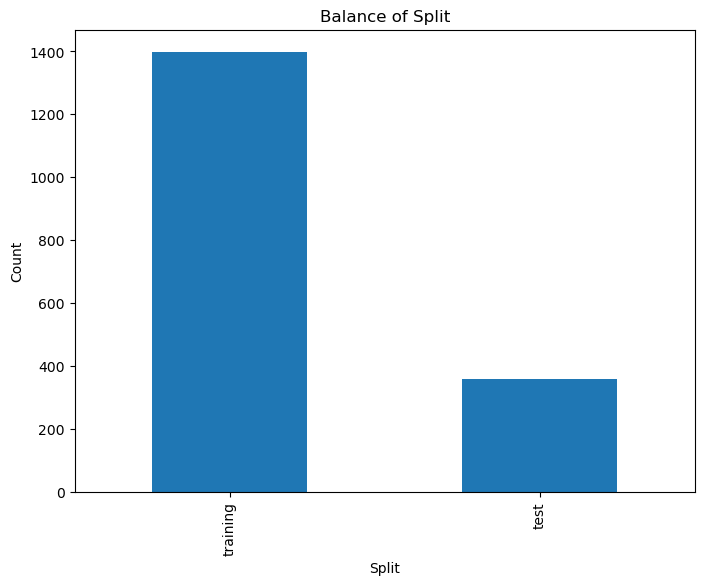

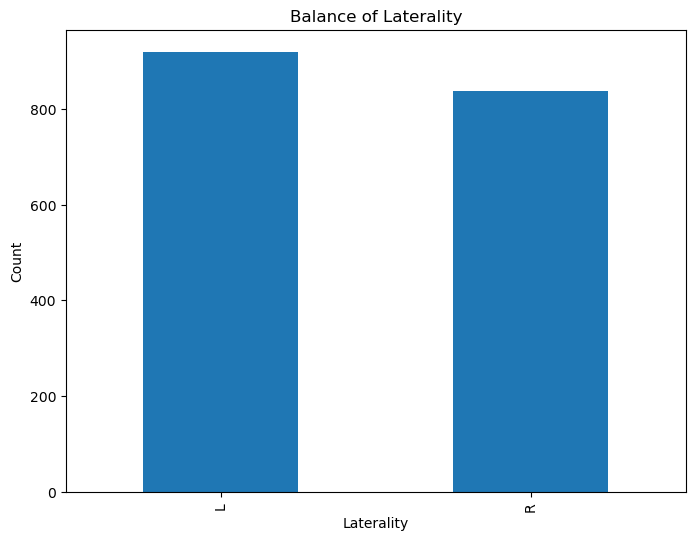

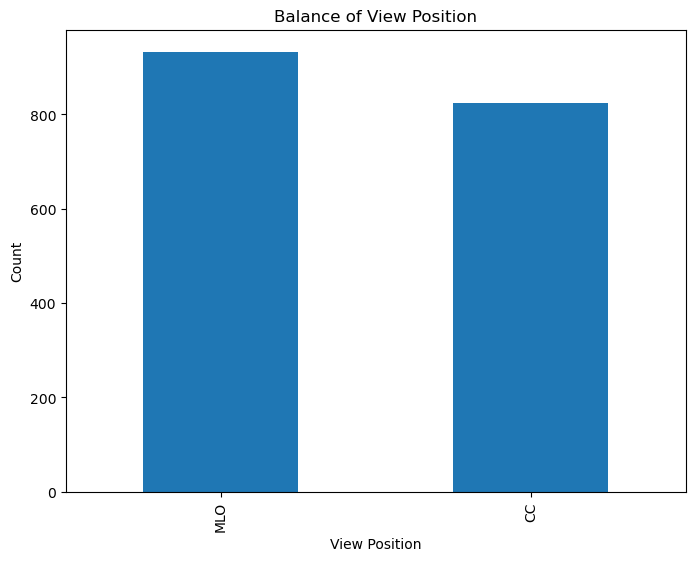

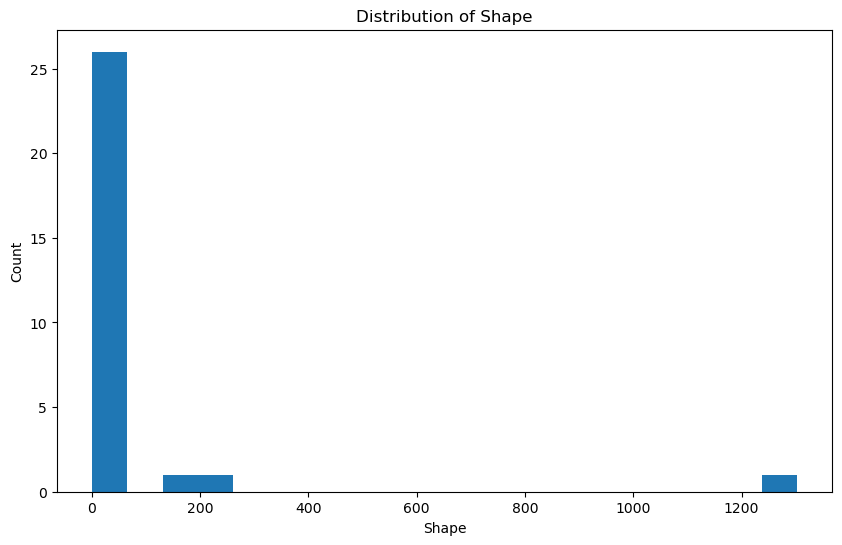

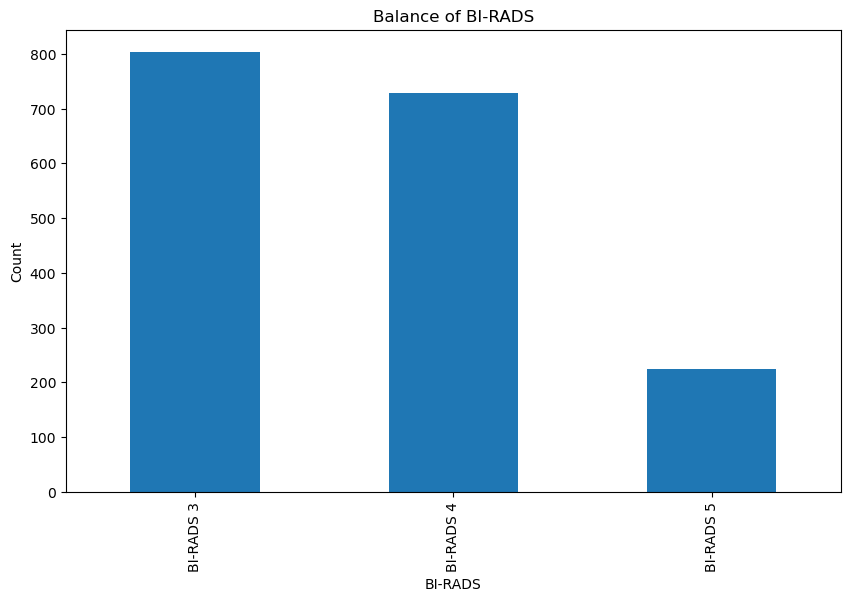

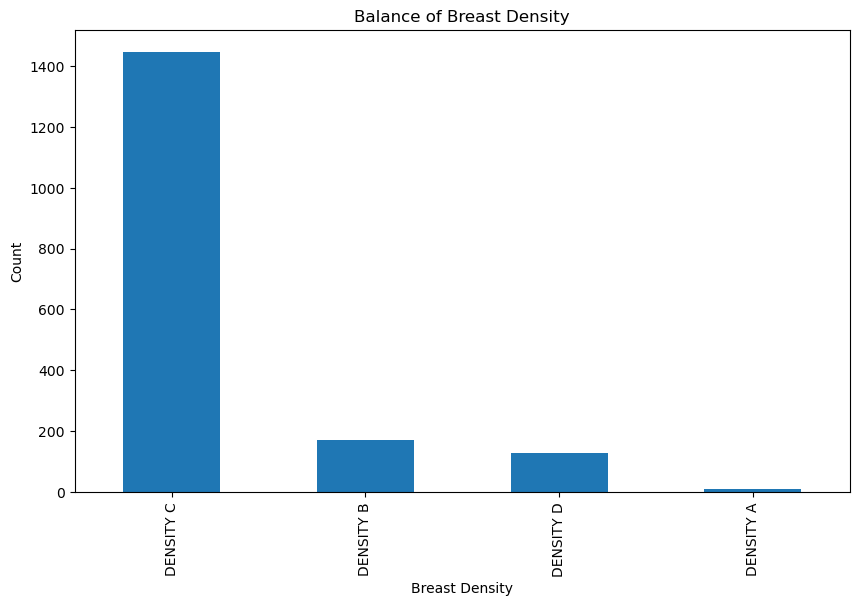

In [24]:
df_breast_filtered_copy = df_breast_filtered.copy()
df_breast_filtered_copy.loc[:, 'image_shape'] = df_breast_filtered_copy['width'].astype(str) + 'x' + df_breast_filtered_copy['height'].astype(str)
df_breast_filtered = df_breast_filtered_copy.copy()

balance_split = df_breast_filtered['split'].value_counts()
balance_laterality = df_breast_filtered['laterality'].value_counts()
balance_view_position = df_breast_filtered['view_position'].value_counts()
balance_birads = df_breast_filtered['breast_birads'].value_counts()
balance_density = df_breast_filtered['breast_density'].value_counts()
balance_shape = df_breast_filtered['image_shape'].value_counts()


print("Split:")
print(balance_split)
print()

print("Laterality:")
print(balance_laterality)
print()

print("View Position:")
print(balance_view_position)
print()

print("Shape:")
print(balance_shape)
print()

print("BI-RADS:")
print(balance_birads)
print()

print("Density:")
print(balance_density)


# Plotting Split
plt.figure(figsize=(8, 6))
balance_split.plot(kind='bar')
plt.title('Balance of Split')
plt.xlabel('Split')
plt.ylabel('Count')
plt.show()

# Plotting laterality
plt.figure(figsize=(8, 6))
balance_laterality.plot(kind='bar')
plt.title('Balance of Laterality')
plt.xlabel('Laterality')
plt.ylabel('Count')
plt.show()

# Plotting view_position
plt.figure(figsize=(8, 6))
balance_view_position.plot(kind='bar')
plt.title('Balance of View Position')
plt.xlabel('View Position')
plt.ylabel('Count')
plt.show()

# Plotting shape
plt.figure(figsize=(10, 6))
balance_shape.plot(kind='hist', bins=20)
plt.title('Distribution of Shape')
plt.xlabel('Shape')
plt.ylabel('Count')
plt.show()

# Plotting breast_birads
plt.figure(figsize=(10, 6))
balance_birads.plot(kind='bar')
plt.title('Balance of BI-RADS')
plt.xlabel('BI-RADS')
plt.ylabel('Count')
plt.show()

# Plotting breast_density
plt.figure(figsize=(10, 6))
balance_density.plot(kind='bar')
plt.title('Balance of Breast Density')
plt.xlabel('Breast Density')
plt.ylabel('Count')
plt.show()

**As you can see, the train/test ratio (0.256) is almost the same as the original dataset split (0.25). So we decide to do not shuffle and split the data again**

## Finding Annotations

### Annotation per image statistics

In [25]:
min_rows_by_image = df_findings_filtered['image_id'].value_counts().min()
max_rows_by_image = df_findings_filtered['image_id'].value_counts().max()
avg_rows_by_image = df_findings_filtered['image_id'].value_counts().mean()

print("Minimum Number of Data Rows by image_id:", min_rows_by_image)
print("Maximum Number of Data Rows by image_id:", max_rows_by_image)
print("Average Number of Data Rows by image_id:", avg_rows_by_image)

Minimum Number of Data Rows by image_id: 1
Maximum Number of Data Rows by image_id: 7
Average Number of Data Rows by image_id: 1.2767653758542141


finding_categories:
['Mass']                                                                                            1123
['Suspicious Calcification']                                                                         402
['Focal Asymmetry']                                                                                  232
['Architectural Distortion']                                                                          95
['Asymmetry']                                                                                         90
['Suspicious Calcification', 'Mass']                                                                  82
['Suspicious Lymph Node']                                                                             56
['Skin Thickening']                                                                                   34
['Suspicious Calcification', 'Focal Asymmetry']                                                       31
['Global Asymmetry']               

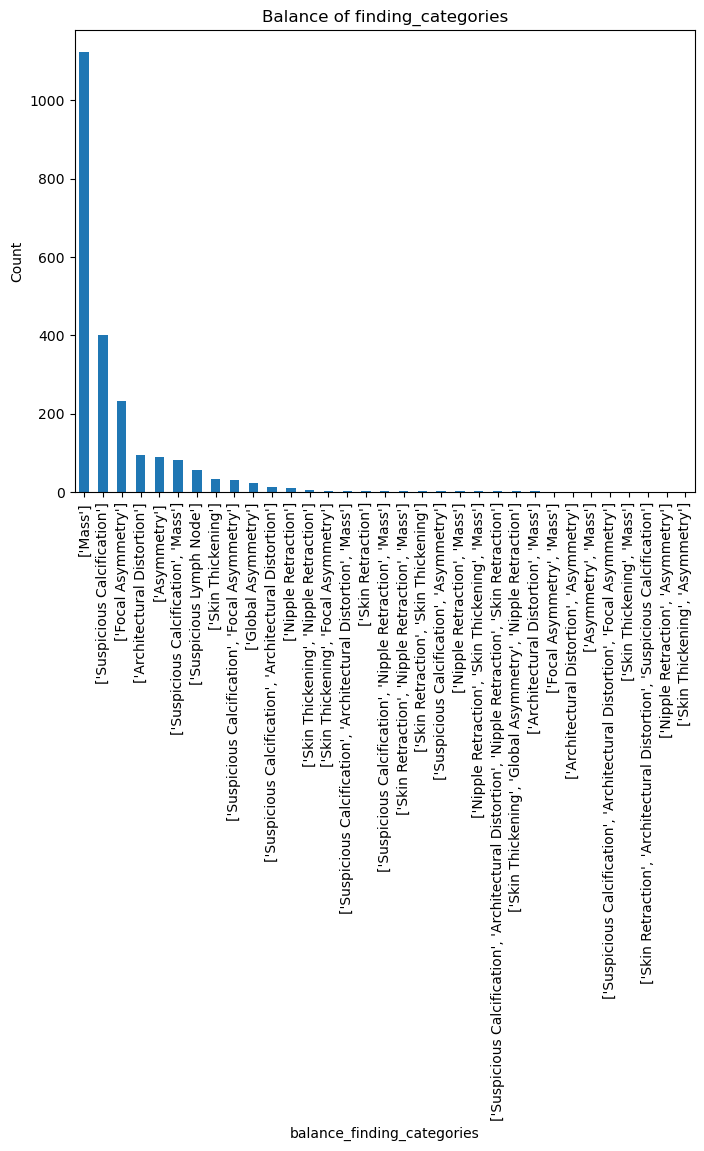

In [26]:
balance_finding_categories = df_findings_filtered['finding_categories'].value_counts()

print("finding_categories:")
print(balance_finding_categories)
print()

# Plotting laterality
plt.figure(figsize=(8, 6))
balance_finding_categories.plot(kind='bar')
plt.title('Balance of finding_categories')
plt.xlabel('balance_finding_categories')
plt.ylabel('Count')
plt.show()

### valid/invalid annotations

In [27]:
valid_rows = (
    (df_findings_filtered['xmin'] >= 0) &
    (df_findings_filtered['xmax'] > df_findings_filtered['xmin']) &
    (df_findings_filtered['xmax'] <= df_findings_filtered['width']) &
    (df_findings_filtered['ymin'] >= 0) &
    (df_findings_filtered['ymax'] > df_findings_filtered['ymin']) &
    (df_findings_filtered['ymax'] <= df_findings_filtered['height'])
)
invalid_rows = ~valid_rows

num_valid_rows = valid_rows.sum()
num_invalid_rows = invalid_rows.sum()

# Print some examples of invalid rows
print("Examples of Invalid Rows:")
print(df_findings_filtered.loc[invalid_rows, ['xmin', 'ymin', 'xmax', 'ymax', 'width', 'height']])#.sample(5))

print("Number of Valid Data Rows:", num_valid_rows)
print("Number of Invalid Data Rows:", num_invalid_rows)

Examples of Invalid Rows:
Empty DataFrame
Columns: [xmin, ymin, xmax, ymax, width, height]
Index: []
Number of Valid Data Rows: 2242
Number of Invalid Data Rows: 0


In [28]:
# Calculate the bbox area
df_findings_filtered['bbox_area'] = (df_findings_filtered['xmax'] - df_findings_filtered['xmin']) * (df_findings_filtered['ymax'] - df_findings_filtered['ymin'])

# Calculate the image area
df_findings_filtered['image_area'] = df_findings_filtered['width'] * df_findings_filtered['height']

# Calculate the bbox area to image area percentage
df_findings_filtered['bbox_area_percentage_individual'] = (df_findings_filtered['bbox_area'] / df_findings_filtered['image_area']) * 100

# Calculate the statistics
bbox_area_percentage_stats = df_findings_filtered['bbox_area_percentage_individual'].describe()

# Print the statistics
print("Bbox Area to Image Area Percentage Statistics:")
print(bbox_area_percentage_stats[['min', 'max', 'mean']])


Bbox Area to Image Area Percentage Statistics:
min      0.005343
max     27.635832
mean     1.254677
Name: bbox_area_percentage_individual, dtype: float64


In [29]:
# Group by image_id and calculate the total bbox area and total image area for each image
image_areas = df_findings_filtered.groupby('image_id')[['bbox_area', 'image_area']].sum()

# Calculate the bbox area to image area percentage
image_areas['bbox_area_percentage_total'] = (image_areas['bbox_area'] / image_areas['image_area']) * 100

# Calculate the statistics
bbox_area_percentage_stats = image_areas['bbox_area_percentage_total'].describe()

# Print the statistics
print("Bbox Area to Image Area Percentage Statistics:")
print(bbox_area_percentage_stats[['min', 'max', 'mean']])


Bbox Area to Image Area Percentage Statistics:
min      0.010943
max     27.635832
mean     1.239056
Name: bbox_area_percentage_total, dtype: float64
